In [9]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
import pandas as pd
import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import time

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [16]:
pi_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA_preind_091719.nc')
ox_bc = nc.Dataset('/data/tjarniko/MEOPAR/tracers/north/tr_northDICTAOXY.nc')
print(pi_bc)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time_counter(12), deptht(40), yb(10), xbT(30)
    variables(dimensions): float32 TA(time_counter,deptht,yb,xbT), float32 deptht(deptht), float32 time_counter(time_counter), float32 vosaline(time_counter,deptht,yb,xbT), float32 votemper(time_counter,deptht,yb,xbT), float32 DIC(time_counter,deptht,yb,xbT)
    groups: 



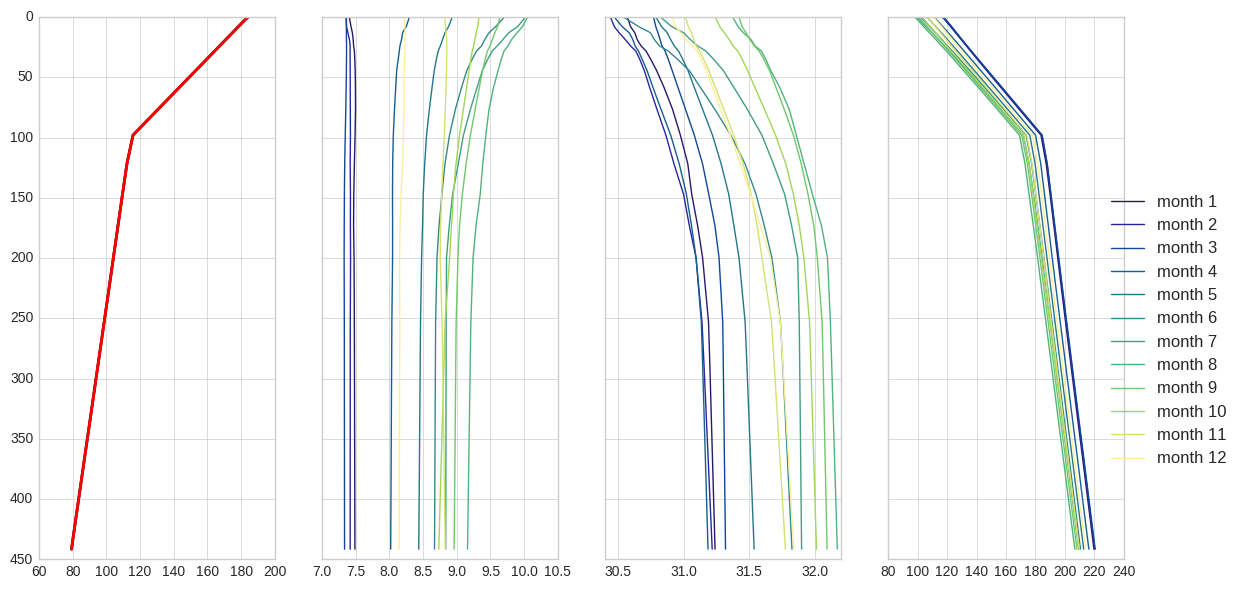

In [29]:


fig, (ax, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(14, 7), sharey=True)
ax.invert_yaxis()
ax.plot(ox_bc['OXY'][0,:,0,0],ox_bc['deptht'][:],linewidth = 2, linestyle='-',color = 'k', ) 
ax.plot(ox_bc['OXY'][1,:,0,0],ox_bc['deptht'][:],linewidth = 2, linestyle='-',color = 'r', ) 

n = 12
colors = cm.cm.haline(np.linspace(0,1,n))

for i in range(0,12):
    ax2.plot(pi_bc['votemper'][i,:,0,0],ox_bc['deptht'][:], color = colors[i],label = 'month '+ str(i+1))
for i in range(0,12):
    ax3.plot(pi_bc['vosaline'][i,:,0,0],ox_bc['deptht'][:], color = colors[i], label = 'month '+ str(i+1))
for i in range(0,12):
    OXY = ox_bc['OXY'][0,:,0,0]
    sal = pi_bc['vosaline'][i,:,0,0]
    temp = pi_bc['votemper'][i,:,0,0]
    depth_this = ox_bc['deptht'][i]
    osol = gsw.O2sol(sal,temp,depth_this,-125,50)
    AOU = osol - OXY
    ax4.plot(AOU,ox_bc['deptht'][:], color = colors[i], label = 'month '+ str(i+1))
    ax4.legend(bbox_to_anchor=[1.5,0.7])
    